In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Vaikuttaa kaavioiden ulkoasuun:
sns.set()

In [2]:
df = pd.read_excel('http://taanila.fi/KidCreative.xlsx')


In [3]:
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [24]:
df.drop(['Obs No.'], axis=1, inplace=True)

In [25]:
df.head()

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


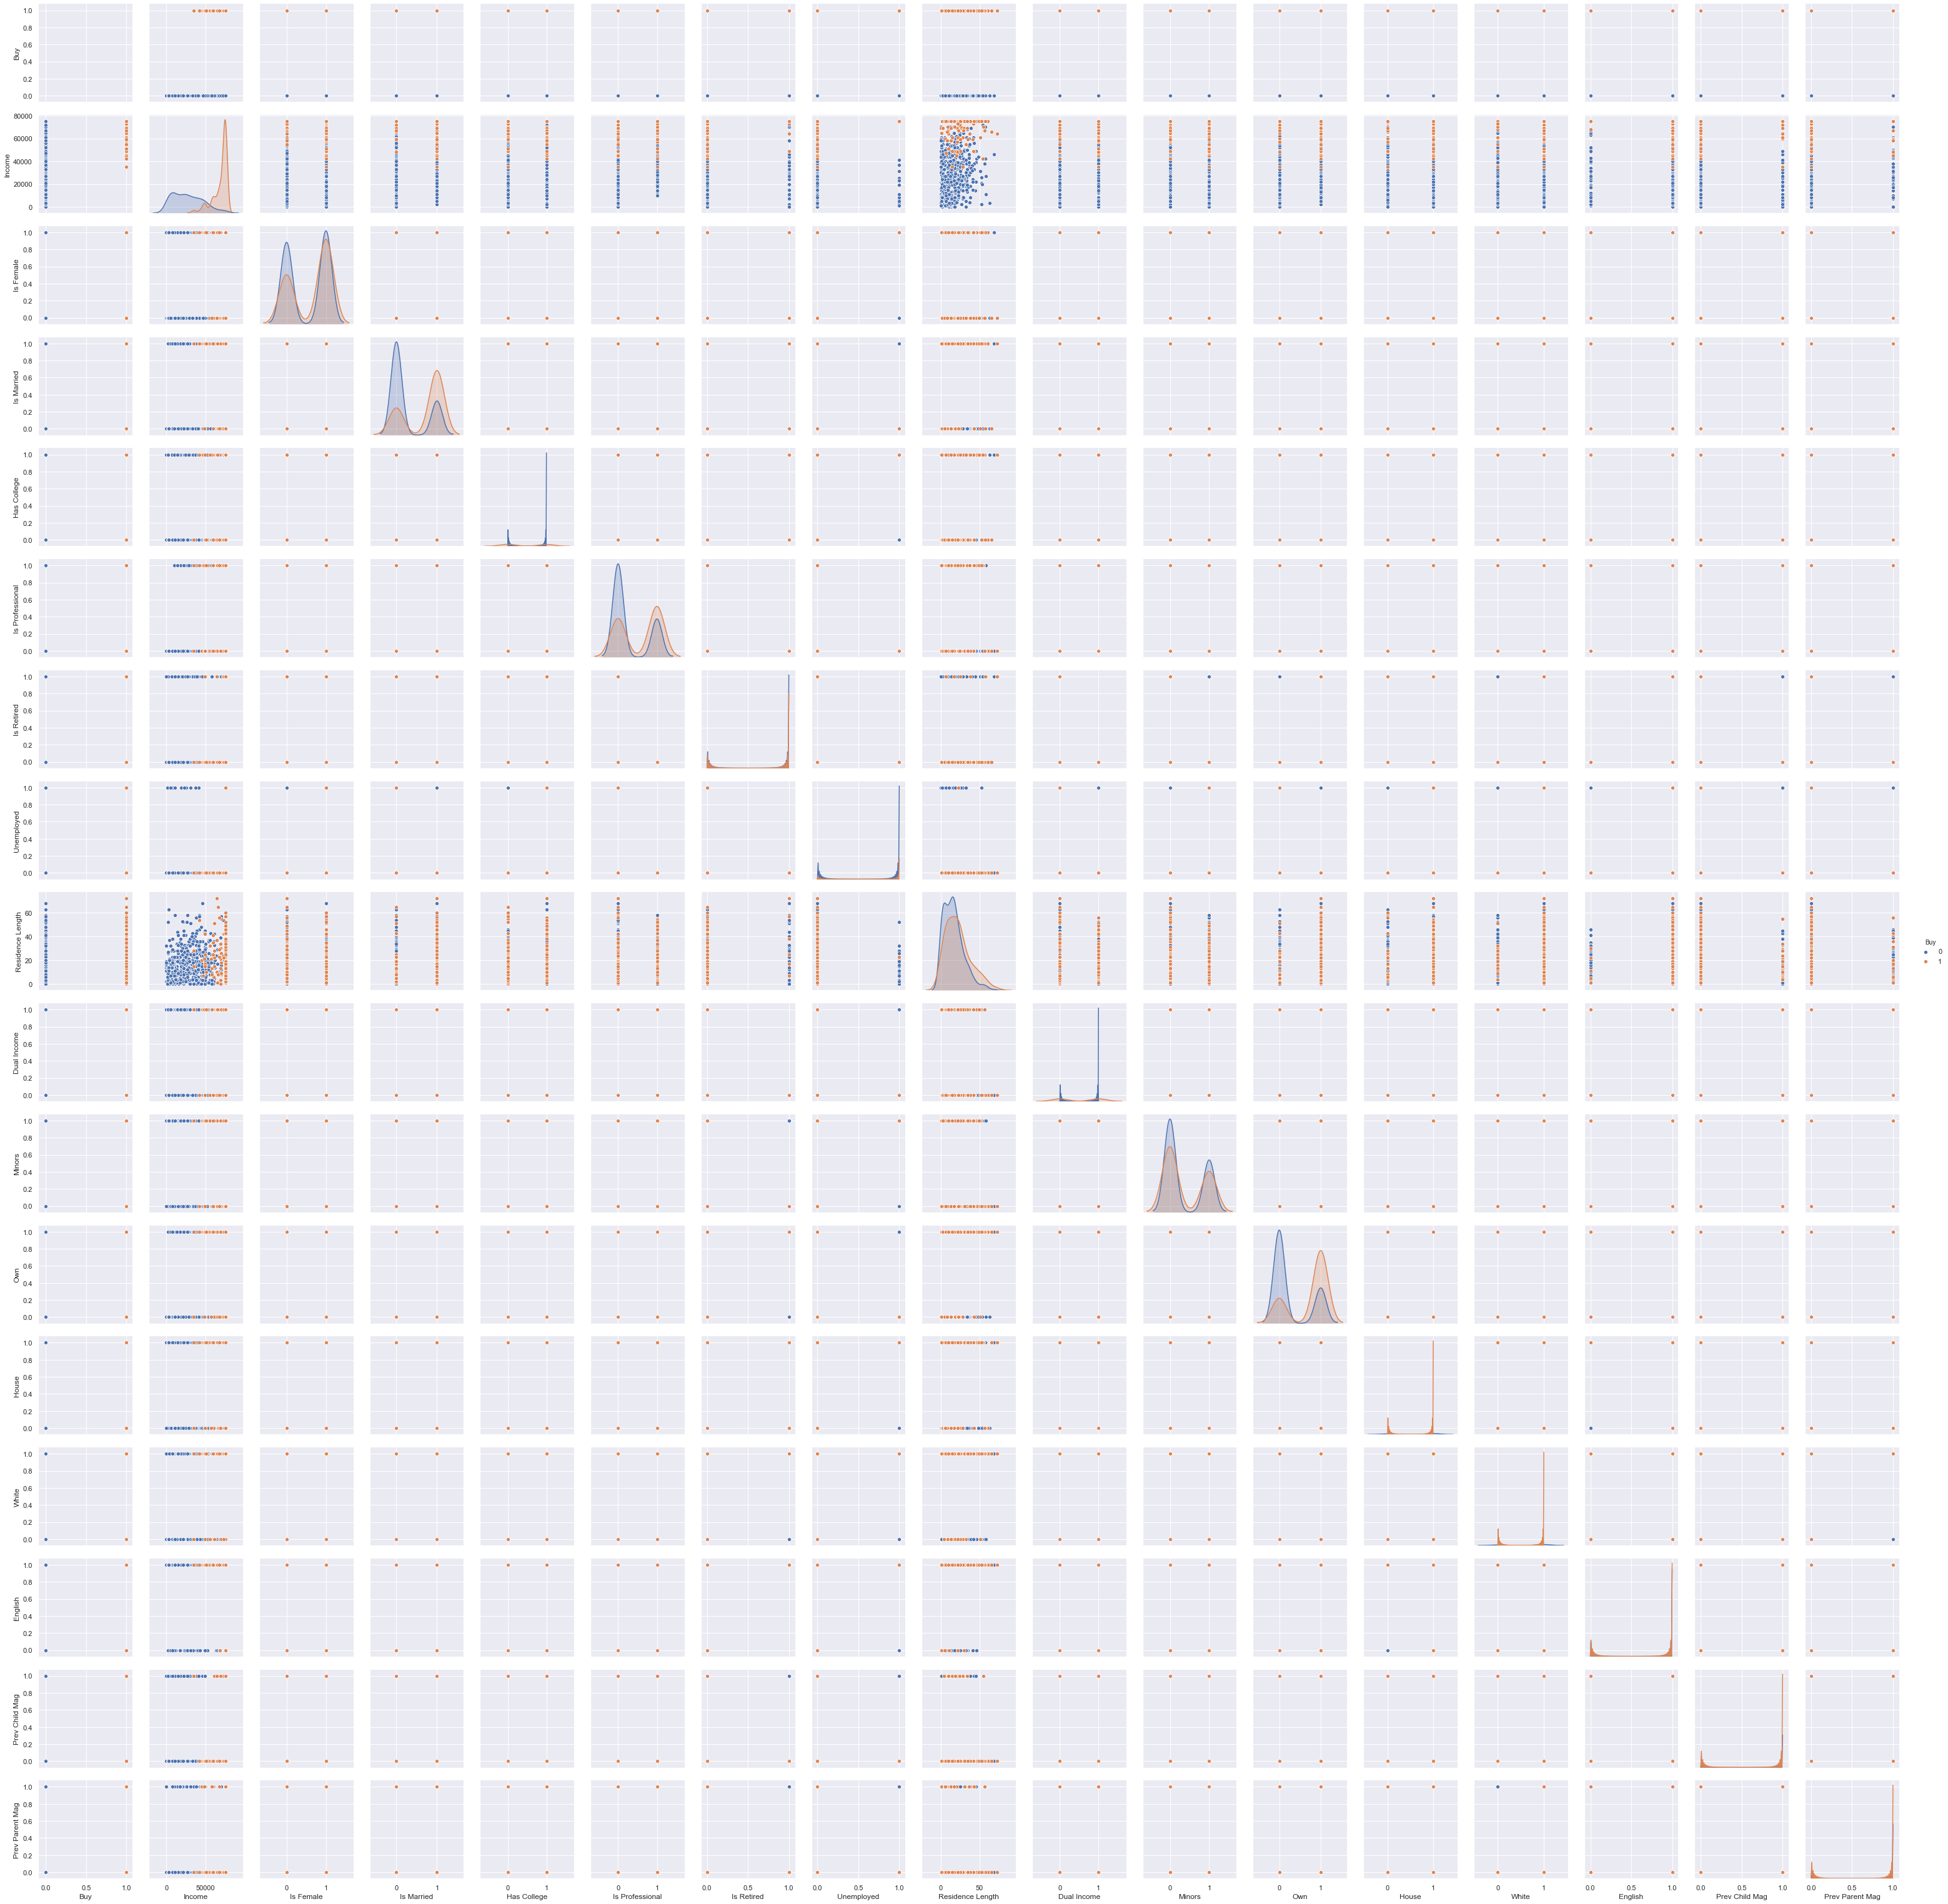

In [26]:
sns.pairplot(df, hue='Buy')

In [28]:
#Feature-matriisi on iris-data ilman species-muuttujaa:
X = df.drop('Buy', axis=1)

#Target on species (laji):
y = df['Buy']

In [29]:
#train_test_split jakaa datan opetusdataan ja testidataan (25 % datasta, jolloin toisin määrätä).
#random_state määrittää satunnaislukugeneraattorin siemenluvun. Sama siemenluku takaa saman jaottelun
#eri suorituskerroilla.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=5)

In [30]:
#Logistisen regressiomallin tuonti:
from sklearn.linear_model import LogisticRegression

#Mallin sovitus:
malli = LogisticRegression()
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#Oikeaan osuneiden ennusteiden osuus opetusdatassa:

from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_malli)

0.9047619047619048

In [32]:
#Oikeaan osuneiden ennusteiden osuus testidatassa:

accuracy_score(y_test, y_test_malli)

0.8875739644970414

In [33]:
#Confusion-matriisi opetusdatalle:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[388  21]
 [ 27  68]]


In [34]:
#Confusion-matriisi testidatalle:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_malli))

[[128  11]
 [  8  22]]
